In [1]:
import PIL as pil
import numpy as np
import matplotlib.pyplot as plt
import  photutils as ph
from astropy.stats import sigma_clipped_stats
from astropy.stats import sigma_clip

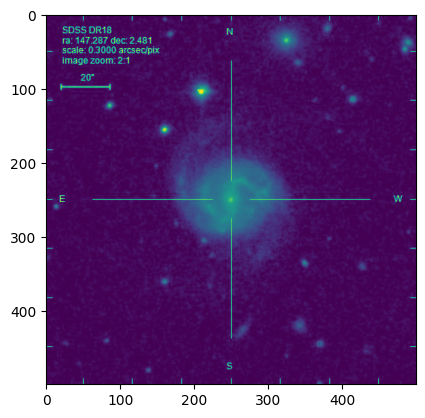

In [137]:
#Open image and convert it to numpy array
img=pil.Image.open("/home/kevin/aufklarung_astro_station/project2/images/image_147.28652ra_2.4808198dec_GALAXY_540602138078767104specObjID_SDSS_dr18.jpg")
img_array=np.array(img)
img_array.shape
img_array=img_array[:,:,1]
plt.imshow(img_array)

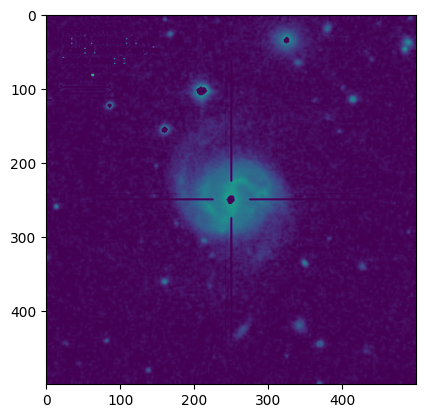

In [191]:
#Mask all bright sources 

from astropy.stats import sigma_clipped_stats, SigmaClip
from photutils.segmentation import detect_threshold, detect_sources
from photutils.utils import circular_footprint

#Make sigma clipping
sigma_clip = SigmaClip(sigma=6, maxiters=3)
#Do thresholding for segmentation of detected bright sources
threshold = detect_threshold(img_array, nsigma=7, sigma_clip=sigma_clip)
segment_img = detect_sources(img_array, threshold, npixels=5)
footprint = circular_footprint(radius=1)

#Apply mask
mask = segment_img.make_source_mask(footprint=footprint)
#mask = segment_img.data>0
clipped_data = np.where(mask, 0, img_array)
plt.imshow(clipped_data)

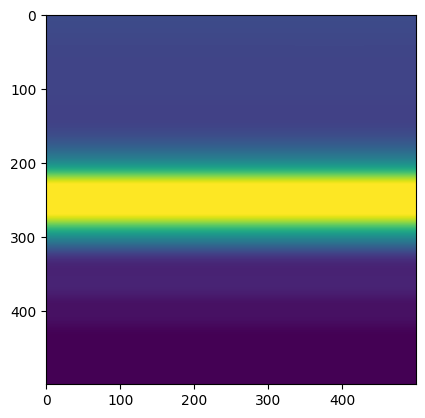

In [192]:
#Estimate background and subtract it

from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground, MeanBackground, SExtractorBackground, MMMBackground,BiweightLocationBackground
bkg_estimator =MedianBackground(sigma_clip=sigma_clip)
bkg = Background2D(clipped_data, (20, 200), filter_size=(7, 7),
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator, mask=mask)

plt.imshow(bkg.background)

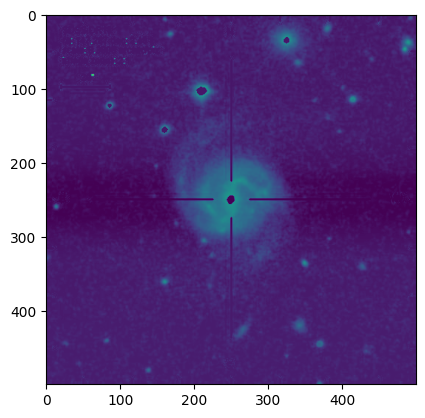

In [193]:
#Subtracte
subtracted=clipped_data - bkg.background
plt.imshow(subtracted)